# Natural Language Processing 
![Was ist NLP](<https://s2.qwant.com/thumbr/0x380/c/e/10c54c87272bdae830c4378495ff38b0e0af52906cdb0b0f6836eb4ad110f0/NLP-word-cloud-e1432237783661.jpg?u=https%3A%2F%2Fwww.thoughtmodels.com%2Fwp-content%2Fuploads%2F2016%2F06%2FNLP-word-cloud-e1432237783661.jpg&q=0&b=1&p=0&a=1>)


# Was ist Natural Language Processing?

### -eine mit der Computerlinguistik verwandte Disziplin

### -Verarbeitung natürlicher Sprache (gesprochen und als Text) durch Computer

### -Interaktion zwischen Mensch und Maschine auf der Basis menschlicher Sprache

### -Befähigt Software menschliche Sprache als Input zu erfassen und passende Ergebnisse als Output zur Verfügung zu stellen

# Warum Natural Language Processing?

-> Grafik Entwicklung des Anteils unstrukturierter Daten weltweit

### -Informationen und Inhalte werden direkt vom Kunden erstellt

### -Menschen unterschiedlicher Demographien, Regionen und Kulturen

### -nützlich bei der Erstellung von Kundenprofilen, sowie dem Erkennen von Trends und Entwicklungen

# Einsatz von Natural Language Processing

### Sprachassistenten

![Siri](<https://sophosnews.files.wordpress.com/2017/07/siri-1200.jpg?w=780&h=408&crop=1>)







## bessere Übersetzungen dank des mit Einbeziehens von Grammatik und Semantik

![Google Tranlate](<http://icons.iconarchive.com/icons/marcus-roberto/google-play/256/Google-Translate-icon.png>)







## die "beliebten" Chatbots

![Chatbot](<https://mobilemonkey.com/wp-content/uploads/2017/04/efYxWC6.jpg>)

# Ein Anwendungsbeispiel: Named Entity Recognition

## Was ist Named Entity Recognition, bzw. "Eigennamenerkennung"?
### -automatische Identifikation und Klassifikation von Eigennamen

### -ein Eigenname beschreibt eine real existierende Identität
### -> Personen
### -> Organisationen
### -> Orte
### -> etc.

# Beispielsatz: Max Maier fährt mit seinem Auto zur TDWI nach München

In [70]:
import spacy
from spacy import displacy
import de_core_news_sm
nlp = de_core_news_sm.load()

text = 'Max Maier fährt mit dem Auto zur TDWI nach München.'

doc = nlp(text)

sentences = [x for x in doc.sents]

In [71]:
displacy.render(nlp(sentences[0].string), jupyter=True, style='ent')

In [72]:
displacy.render(nlp((sentences[0].string)), style='dep', jupyter = True, options = {'distance': 120})

# Anwendungsmöglichkeiten?

-> z.B. zur Anonymisierung von Personen in Texten


![Named Entity Recognition](<./Grafiken/NaturalEntityRecognition.jpg>)

In [73]:
text = 'Max Maier fährt mit dem Auto zur TDWI nach München.'

doc = nlp(text)

typeList = []
censored = []
for word in doc:
    if word.ent_type_ == 'PER' and len(word) > 1:
        cens = 'X'*5
        censored.append(cens)
    else:
        censored.append(word.text)

In [74]:
str(censored)

"['XXXXX', 'XXXXX', 'fährt', 'mit', 'dem', 'Auto', 'zur', 'TDWI', 'nach', 'München', '.']"

### Wo bin ich Übersicht

# Herausforderungen

## Typischerweise werden durch Algorithmen strukturierte, numerische Daten analysiert

![Datenanalyse](<./Grafiken/Netzwerk_Daten.jpg>)

## Was sind strukturierte Daten?

In [75]:
Attribut_1 = ['X','X','X']
Attribut_2 = ['X','X','X']
Attribut_3 = ['X','X','X']

array = {}
array['Attribut_1'] = Attribut_1
array['Attribut_2'] = Attribut_2
array['Attribut_3'] = Attribut_3

import pandas as pd
Dataframe = pd.DataFrame.from_dict(array)
Dataframe

,Attribut_1,Attribut_2,Attribut_3
0,X,X,X
1,X,X,X
2,X,X,X


In [76]:
Länge = [3,5,8]
Breite = [9,7,3]
Höhe = [4,2,7]

maßearray = {}
maßearray['Länge'] = Länge
maßearray['Breite'] = Breite
maßearray['Höhe'] = Höhe

import pandas as pd
MaßeDataframe = pd.DataFrame.from_dict(maßearray)
MaßeDataframe

,Länge,Breite,Höhe
0,3,9,4
1,5,7,2
2,8,3,7


## Text als Dataframe?

## so nicht:

In [77]:
Haus = ['groß', 'breit', 'neu']
Auto = ['schnell', 'BMW', 'Porsche']
Flugzeug = ['Triebwerk', 'Airbus', 'fliegt']

wortearray = {}
wortearray['Haus'] = Haus
wortearray['Auto'] = Auto
wortearray['Flugzeug'] = Flugzeug
WorteDataframe = pd.DataFrame.from_dict(wortearray)
WorteDataframe

,Haus,Auto,Flugzeug
0,groß,schnell,Triebwerk
1,breit,BMW,Airbus
2,neu,Porsche,fliegt


# Text-Normalisierung

In [78]:
def read_documents(fqn :str):
    import glob, os
    documents = {}
    
    for file in glob.glob(fqn):

        filename = open(file, "r", encoding='cp1252')
        text = str(filename.readlines())

        path = os.path.basename(file)
        extension = os.path.splitext(file)[1]
        filename, extension = path.split('.')

        documents[filename] = text
            
    return(documents)

In [79]:
# Einlesen des Dokumenten Korpus
documents = read_documents("./Artikel/*.txt")

In [80]:
Dokument_1 = 'Das Auto fährt schnell. Ein Auto ist kein Motorrad.'
Dokument_2 = 'Der Zug fährt schneller als das Auto'
Dokument_3 = 'Ein Flugzeug fliegt'

beispiel = {}
beispiel['Dokument_1'] = Dokument_1
beispiel['Dokument_2'] = Dokument_2
beispiel['Dokument_3'] = Dokument_3

## Tokenisierung

### Wo bin ich Übersicht

Zeig doch gleich mal zuerst was passiert wenn man das nicht macht!!

Und dann kommst du mit der Lösung!

In [81]:
bmw = documents.get('BMW setzt noch einen drauf')

"['Für alle, denen der mächtige X5 nicht groß genug ist, hat BMW jetzt den X7 im Angebot. Bald sogar mit einem neuen V8. \\n', 'Als sich BMW mit dem X5 vor mehr als 20 Jahren ins Segment der SUV wagte, war das noch eine mittlere Sensation. Heute besetzen die Münchner vom X1 an jede Ziffer aufsteigend, und von Mai an ist erst bei der 7 Schluss. Bei 84.300 Euro beginnt dann der Einstieg in die Welt der wahren Full-Size-SUV. Mit einer Länge von 5,15 Meter ist der X7 23 Zentimeter länger als der schon stattliche X5.\\n', 'Dabei sei das Riesen-SUV nicht einfach ein verlängerter X5, lässt BMW wissen. Zwar sei die Plattform bis zur B-Säule gleich, aber sämtliche Karosserieteile seien verschieden, mit Ausnahme der Außenspiegelkappen. Außerdem sei die Windschutzscheibe gleich, gibt BMW zu. Nun, alle X7 haben drei Sitzreihen, Allradantrieb, eine Achtgang-Automatik und Luftfederung. Gebaut werden sie auf einem Band zusammen mit X5 und dem „Coupé“ X6 in Spartanburg, South Carolina. Das X7-Basismodell treibt ein Sechszylinder-Diesel mit drei Liter Hubraum und 265 PS an. Die Variante mit gleich großem Sechszylinder-Benziner bietet 340 PS und kostet 86.300 Euro. Das Spitzenmodell M50d holt aus den drei Litern 400 PS und verlangt nach 109.900 Euro.\\n', '\\n', 'Wert legt BMW vor allem auf den Langstrecken- und somit auf den Reisekomfort. Mit auf große Fahrt können bis zu sieben Personen, allerdings ist dann der noch verbleibende Kofferraum mit 326 Liter Fassungsvermögen schmal. Aber an eine Anhängerkupplung dürfen bis zu 3,5 Tonnen Last.\\n', 'Als Fünfsitzer genutzt, bietet der BMW Raum für 750 Liter Gepäck, maximal passen rechnerisch gar 2120 Liter hinein. Dann darf man allerdings nicht die beiden Einzelsitze für die mittlere Reihe bestellt haben (660 Euro extra), diese lassen sich nicht umlegen, sondern nur vorschieben. Alle Sitzgelegenheiten werden elektrisch bewegt, wie auch die zweigeteilte Heckklappe und das Glasdach, das ebenfalls zum Lieferumfang gehört. Sitzen kann man überall sehr gut, sogar in der letzten Reihe ist noch passabel Platz. Allerdings muss man für den Einstieg schon gelenkig sein. Das Armaturenbrett-Layout unterscheidet sich kaum vom unlängst erneuerten X5, alles ist digital. Das Ausstattungsniveau ist generell höher als im X5. Dort kostet beispielsweise die Luftfederung Aufpreis.\\n', 'Die drei Motoren sind die gleichen wie im X5, die Verbrauchswerte sind aufgrund der höheren Masse etwas schlechter. Wobei die nach Norm 10,5 Liter für den Benziner und die 7,3 oder 8,0 Liter für die beiden Diesel gewiss nur auf dem Papier Bestand haben. Die jeweiligen Höchstgeschwindigkeiten betragen 227, 245 und 250 km/h.\\n', 'Ein 4,4-Liter-V8-Motor mit 462 PS ist nicht für Deutschland vorgesehen, sondern vor allem für Amerika gedacht, einen der Hauptmärkte. Allerdings sei eine neue V8-Maschine – der Effizienz wegen wahrscheinlich mit weniger Hubraum – für Europa in Vorbereitung, heißt es. Eine elektrifizierte Variante (Plug-in-Hybrid) sei noch nicht definitiv beschlossen. Das „Schaun mer mal“ der Verantwortlichen darf aber als starkes Indiz für einen Plug-in gewertet werden. Schließlich ist auch für den X5 eine solche Motorenkombination in Vorbereitung. Dort wird der Sechszylinder-Benzinmotor mit einer Elektromaschine kombiniert, die Systemleistung beträgt 394 PS, das maximale Drehmoment 600 Newtonmeter. Die drei Motoren für den X7 bieten 450, 620 sowie 760 Nm auf. Die höheren Werte gelten für die Diesel.Was Multimedia, Konnektivität und Assistenten angeht, zieht der X7 so ziemlich alle Register. Wie für den X5 gibt es auch ein Offroad-Paket, das 1900 Euro zusätzlich kostet. Dazu gehören unter anderem Verstärkungen am Unterboden, vier spezielle Fahrprogramme und eine mechanische Differentialsperre. Auf ersten Probefahrten beeindruckte der X7 mit seiner Ruhe und Souveränität. In Europa stören wird nicht nur die Größe an sich, sondern auch der Wendekreis von 13 Metern.']"

In [82]:
bmw = bmw.split(' ')

["['Für", 'alle,', 'denen', 'der', 'mächtige', 'X5', 'nicht', 'groß', 'genug', 'ist,', 'hat', 'BMW', 'jetzt', 'den', 'X7', 'im', 'Angebot.', 'Bald', 'sogar', 'mit', 'einem', 'neuen', 'V8.', "\\n',", "'Als", 'sich', 'BMW', 'mit', 'dem', 'X5', 'vor', 'mehr', 'als', '20', 'Jahren', 'ins', 'Segment', 'der', 'SUV', 'wagte,', 'war', 'das', 'noch', 'eine', 'mittlere', 'Sensation.', 'Heute', 'besetzen', 'die', 'Münchner', 'vom', 'X1', 'an', 'jede', 'Ziffer', 'aufsteigend,', 'und', 'von', 'Mai', 'an', 'ist', 'erst', 'bei', 'der', '7', 'Schluss.', 'Bei', '84.300', 'Euro', 'beginnt', 'dann', 'der', 'Einstieg', 'in', 'die', 'Welt', 'der', 'wahren', 'Full-Size-SUV.', 'Mit', 'einer', 'Länge', 'von', '5,15', 'Meter', 'ist', 'der', 'X7', '23', 'Zentimeter', 'länger', 'als', 'der', 'schon', 'stattliche', "X5.\\n',", "'Dabei", 'sei', 'das', 'Riesen-SUV', 'nicht', 'einfach', 'ein', 'verlängerter', 'X5,', 'lässt', 'BMW', 'wissen.', 'Zwar', 'sei', 'die', 'Plattform', 'bis', 'zur', 'B-Säule', 'gleich,', 'aber', 'sämtliche', 'Karosserieteile', 'seien', 'verschieden,', 'mit', 'Ausnahme', 'der', 'Außenspiegelkappen.', 'Außerdem', 'sei', 'die', 'Windschutzscheibe', 'gleich,', 'gibt', 'BMW', 'zu.', 'Nun,', 'alle', 'X7', 'haben', 'drei', 'Sitzreihen,', 'Allradantrieb,', 'eine', 'Achtgang-Automatik', 'und', 'Luftfederung.', 'Gebaut', 'werden', 'sie', 'auf', 'einem', 'Band', 'zusammen', 'mit', 'X5', 'und', 'dem', '„Coupé“', 'X6', 'in', 'Spartanburg,', 'South', 'Carolina.', 'Das', 'X7-Basismodell', 'treibt', 'ein', 'Sechszylinder-Diesel', 'mit', 'drei', 'Liter', 'Hubraum', 'und', '265', 'PS', 'an.', 'Die', 'Variante', 'mit', 'gleich', 'großem', 'Sechszylinder-Benziner', 'bietet', '340', 'PS', 'und', 'kostet', '86.300', 'Euro.', 'Das', 'Spitzenmodell', 'M50d', 'holt', 'aus', 'den', 'drei', 'Litern', '400', 'PS', 'und', 'verlangt', 'nach', '109.900', "Euro.\\n',", "'\\n',", "'Wert", 'legt', 'BMW', 'vor', 'allem', 'auf', 'den', 'Langstrecken-', 'und', 'somit', 'auf', 'den', 'Reisekomfort.', 'Mit', 'auf', 'große', 'Fahrt', 'können', 'bis', 'zu', 'sieben', 'Personen,', 'allerdings', 'ist', 'dann', 'der', 'noch', 'verbleibende', 'Kofferraum', 'mit', '326', 'Liter', 'Fassungsvermögen', 'schmal.', 'Aber', 'an', 'eine', 'Anhängerkupplung', 'dürfen', 'bis', 'zu', '3,5', 'Tonnen', "Last.\\n',", "'Als", 'Fünfsitzer', 'genutzt,', 'bietet', 'der', 'BMW', 'Raum', 'für', '750', 'Liter', 'Gepäck,', 'maximal', 'passen', 'rechnerisch', 'gar', '2120', 'Liter', 'hinein.', 'Dann', 'darf', 'man', 'allerdings', 'nicht', 'die', 'beiden', 'Einzelsitze', 'für', 'die', 'mittlere', 'Reihe', 'bestellt', 'haben', '(660', 'Euro', 'extra),', 'diese', 'lassen', 'sich', 'nicht', 'umlegen,', 'sondern', 'nur', 'vorschieben.', 'Alle', 'Sitzgelegenheiten', 'werden', 'elektrisch', 'bewegt,', 'wie', 'auch', 'die', 'zweigeteilte', 'Heckklappe', 'und', 'das', 'Glasdach,', 'das', 'ebenfalls', 'zum', 'Lieferumfang', 'gehört.', 'Sitzen', 'kann', 'man', 'überall', 'sehr', 'gut,', 'sogar', 'in', 'der', 'letzten', 'Reihe', 'ist', 'noch', 'passabel', 'Platz.', 'Allerdings', 'muss', 'man', 'für', 'den', 'Einstieg', 'schon', 'gelenkig', 'sein.', 'Das', 'Armaturenbrett-Layout', 'unterscheidet', 'sich', 'kaum', 'vom', 'unlängst', 'erneuerten', 'X5,', 'alles', 'ist', 'digital.', 'Das', 'Ausstattungsniveau', 'ist', 'generell', 'höher', 'als', 'im', 'X5.', 'Dort', 'kostet', 'beispielsweise', 'die', 'Luftfederung', "Aufpreis.\\n',", "'Die", 'drei', 'Motoren', 'sind', 'die', 'gleichen', 'wie', 'im', 'X5,', 'die', 'Verbrauchswerte', 'sind', 'aufgrund', 'der', 'höheren', 'Masse', 'etwas', 'schlechter.', 'Wobei', 'die', 'nach', 'Norm', '10,5', 'Liter', 'für', 'den', 'Benziner', 'und', 'die', '7,3', 'oder', '8,0', 'Liter', 'für', 'die', 'beiden', 'Diesel', 'gewiss', 'nur', 'auf', 'dem', 'Papier', 'Bestand', 'haben.', 'Die', 'jeweiligen', 'Höchstgeschwindigkeiten', 'betragen', '227,', '245', 'und', '250', "km/h.\\n',", "'Ein", '4,4-Liter-V8-Motor', 'mit', '462', 'PS', 'ist', 'nicht', 'für', 'Deutschland', 'vorgesehen,', 'sondern', 'vor', 'allem', 'für', 'Amerika', 'gedacht,', 'einen', 'der', 'Hauptmärkte.', 'Allerdings', 'sei', 'eine', 'neue', 'V8-Maschine', '–', 'der', 'Effizienz', 'wegen', 'wahrscheinlich', 'mit', 'weniger', 'Hubraum', '–', 'für', 'Europa', 'in', 'Vorbereitung,', 'heißt', 'es.', 'Eine', 'elektrifizierte', 'Variante', '(Plug-in-Hybrid)', 'sei', 'noch', 'nicht', 'definitiv', 'beschlossen.', 'Das', '„Schaun', 'mer', 'mal“', 'der', 'Verantwortlichen', 'darf', 'aber', 'als', 'starkes', 'Indiz', 'für', 'einen', 'Plug-in', 'gewertet', 'werden.', 'Schließlich', 'ist', 'auch', 'für', 'den', 'X5', 'eine', 'solche', 'Motorenkombination', 'in', 'Vorbereitung.', 'Dort', 'wird', 'der', 'Sechszylinder-Benzinmotor', 'mit', 'einer', 'Elektromaschine', 'kombiniert,', 'die', 'Systemleistung', 'beträgt', '394', 'PS,', 'das', 'maximale', 'Drehmoment', '600', 'Newtonmeter.', 'Die', 'drei', 'Motoren', 'für', 'den', 'X7', 'bieten', '450,', '620', 'sowie', '760', 'Nm', 'auf.', 'Die', 'höheren', 'Werte', 'gelten', 'für', 'die', 'Diesel.Was', 'Multimedia,', 'Konnektivität', 'und', 'Assistenten', 'angeht,', 'zieht', 'der', 'X7', 'so', 'ziemlich', 'alle', 'Register.', 'Wie', 'für', 'den', 'X5', 'gibt', 'es', 'auch', 'ein', 'Offroad-Paket,', 'das', '1900', 'Euro', 'zusätzlich', 'kostet.', 'Dazu', 'gehören', 'unter', 'anderem', 'Verstärkungen', 'am', 'Unterboden,', 'vier', 'spezielle', 'Fahrprogramme', 'und', 'eine', 'mechanische', 'Differentialsperre.', 'Auf', 'ersten', 'Probefahrten', 'beeindruckte', 'der', 'X7', 'mit', 'seiner', 'Ruhe', 'und', 'Souveränität.', 'In', 'Europa', 'stören', 'wird', 'nicht', 'nur', 'die', 'Größe', 'an', 'sich,', 'sondern', 'auch', 'der', 'Wendekreis', 'von', '13', "Metern.']"]

'Angebot.'     "\\n',"     "Euro.\\n'

In [83]:
def tokenizer(documents):
    tokenized = {}
    
    for doc in documents:
        
        document = documents.get(doc)
        punctuations = ['(',')',';',':','[',']','{','}',',','.','-','``',"''",'!','\"','§','$','%','&','?','@','+','–','~','*','#','\'','\\n','\\','„','“']
        cleaned = []

        token = document.split(' ')

        for t in token:
            temp = t
            for p in punctuations:
                if p in t:
                    temp = temp.replace(p, '')
            cleaned.append(temp.lower())
            
        tokenized[doc] = cleaned
        #bei kMeans: str(cleaned)

    return(tokenized)

In [84]:
# Tokinisieren der Corpi
tokenized = tokenizer(documents)

In [85]:
beispiel_tokenized = tokenizer(beispiel)
beispiel_tokenized

{'Dokument_1': ['das',
  'auto',
  'fährt',
  'schnell',
  'ein',
  'auto',
  'ist',
  'kein',
  'motorrad'],
 'Dokument_2': ['der', 'zug', 'fährt', 'schneller', 'als', 'das', 'auto'],
 'Dokument_3': ['ein', 'flugzeug', 'fliegt']}

In [86]:
bmw = tokenized.get('BMW setzt noch einen drauf')

['für', 'alle', 'denen', 'der', 'mächtige', 'x5', 'nicht', 'groß', 'genug', 'ist', 'hat', 'bmw', 'jetzt', 'den', 'x7', 'im', 'angebot', 'bald', 'sogar', 'mit', 'einem', 'neuen', 'v8', '', 'als', 'sich', 'bmw', 'mit', 'dem', 'x5', 'vor', 'mehr', 'als', '20', 'jahren', 'ins', 'segment', 'der', 'suv', 'wagte', 'war', 'das', 'noch', 'eine', 'mittlere', 'sensation', 'heute', 'besetzen', 'die', 'münchner', 'vom', 'x1', 'an', 'jede', 'ziffer', 'aufsteigend', 'und', 'von', 'mai', 'an', 'ist', 'erst', 'bei', 'der', '7', 'schluss', 'bei', '84300', 'euro', 'beginnt', 'dann', 'der', 'einstieg', 'in', 'die', 'welt', 'der', 'wahren', 'fullsizesuv', 'mit', 'einer', 'länge', 'von', '515', 'meter', 'ist', 'der', 'x7', '23', 'zentimeter', 'länger', 'als', 'der', 'schon', 'stattliche', 'x5', 'dabei', 'sei', 'das', 'riesensuv', 'nicht', 'einfach', 'ein', 'verlängerter', 'x5', 'lässt', 'bmw', 'wissen', 'zwar', 'sei', 'die', 'plattform', 'bis', 'zur', 'bsäule', 'gleich', 'aber', 'sämtliche', 'karosserieteile', 'seien', 'verschieden', 'mit', 'ausnahme', 'der', 'außenspiegelkappen', 'außerdem', 'sei', 'die', 'windschutzscheibe', 'gleich', 'gibt', 'bmw', 'zu', 'nun', 'alle', 'x7', 'haben', 'drei', 'sitzreihen', 'allradantrieb', 'eine', 'achtgangautomatik', 'und', 'luftfederung', 'gebaut', 'werden', 'sie', 'auf', 'einem', 'band', 'zusammen', 'mit', 'x5', 'und', 'dem', 'coupé', 'x6', 'in', 'spartanburg', 'south', 'carolina', 'das', 'x7basismodell', 'treibt', 'ein', 'sechszylinderdiesel', 'mit', 'drei', 'liter', 'hubraum', 'und', '265', 'ps', 'an', 'die', 'variante', 'mit', 'gleich', 'großem', 'sechszylinderbenziner', 'bietet', '340', 'ps', 'und', 'kostet', '86300', 'euro', 'das', 'spitzenmodell', 'm50d', 'holt', 'aus', 'den', 'drei', 'litern', '400', 'ps', 'und', 'verlangt', 'nach', '109900', 'euro', '', 'wert', 'legt', 'bmw', 'vor', 'allem', 'auf', 'den', 'langstrecken', 'und', 'somit', 'auf', 'den', 'reisekomfort', 'mit', 'auf', 'große', 'fahrt', 'können', 'bis', 'zu', 'sieben', 'personen', 'allerdings', 'ist', 'dann', 'der', 'noch', 'verbleibende', 'kofferraum', 'mit', '326', 'liter', 'fassungsvermögen', 'schmal', 'aber', 'an', 'eine', 'anhängerkupplung', 'dürfen', 'bis', 'zu', '35', 'tonnen', 'last', 'als', 'fünfsitzer', 'genutzt', 'bietet', 'der', 'bmw', 'raum', 'für', '750', 'liter', 'gepäck', 'maximal', 'passen', 'rechnerisch', 'gar', '2120', 'liter', 'hinein', 'dann', 'darf', 'man', 'allerdings', 'nicht', 'die', 'beiden', 'einzelsitze', 'für', 'die', 'mittlere', 'reihe', 'bestellt', 'haben', '660', 'euro', 'extra', 'diese', 'lassen', 'sich', 'nicht', 'umlegen', 'sondern', 'nur', 'vorschieben', 'alle', 'sitzgelegenheiten', 'werden', 'elektrisch', 'bewegt', 'wie', 'auch', 'die', 'zweigeteilte', 'heckklappe', 'und', 'das', 'glasdach', 'das', 'ebenfalls', 'zum', 'lieferumfang', 'gehört', 'sitzen', 'kann', 'man', 'überall', 'sehr', 'gut', 'sogar', 'in', 'der', 'letzten', 'reihe', 'ist', 'noch', 'passabel', 'platz', 'allerdings', 'muss', 'man', 'für', 'den', 'einstieg', 'schon', 'gelenkig', 'sein', 'das', 'armaturenbrettlayout', 'unterscheidet', 'sich', 'kaum', 'vom', 'unlängst', 'erneuerten', 'x5', 'alles', 'ist', 'digital', 'das', 'ausstattungsniveau', 'ist', 'generell', 'höher', 'als', 'im', 'x5', 'dort', 'kostet', 'beispielsweise', 'die', 'luftfederung', 'aufpreis', 'die', 'drei', 'motoren', 'sind', 'die', 'gleichen', 'wie', 'im', 'x5', 'die', 'verbrauchswerte', 'sind', 'aufgrund', 'der', 'höheren', 'masse', 'etwas', 'schlechter', 'wobei', 'die', 'nach', 'norm', '105', 'liter', 'für', 'den', 'benziner', 'und', 'die', '73', 'oder', '80', 'liter', 'für', 'die', 'beiden', 'diesel', 'gewiss', 'nur', 'auf', 'dem', 'papier', 'bestand', 'haben', 'die', 'jeweiligen', 'höchstgeschwindigkeiten', 'betragen', '227', '245', 'und', '250', 'km/h', 'ein', '44literv8motor', 'mit', '462', 'ps', 'ist', 'nicht', 'für', 'deutschland', 'vorgesehen', 'sondern', 'vor', 'allem', 'für', 'amerika', 'gedacht', 'einen', 'der', 'hauptmärkte', 'allerdings', 'sei', 'eine', 'neue', 'v8maschine', '', 'der', 'effizienz', 'wegen', 'wahrscheinlich', 'mit', 'weniger', 'hubraum', '', 'für', 'europa', 'in', 'vorbereitung', 'heißt', 'es', 'eine', 'elektrifizierte', 'variante', 'pluginhybrid', 'sei', 'noch', 'nicht', 'definitiv', 'beschlossen', 'das', 'schaun', 'mer', 'mal', 'der', 'verantwortlichen', 'darf', 'aber', 'als', 'starkes', 'indiz', 'für', 'einen', 'plugin', 'gewertet', 'werden', 'schließlich', 'ist', 'auch', 'für', 'den', 'x5', 'eine', 'solche', 'motorenkombination', 'in', 'vorbereitung', 'dort', 'wird', 'der', 'sechszylinderbenzinmotor', 'mit', 'einer', 'elektromaschine', 'kombiniert', 'die', 'systemleistung', 'beträgt', '394', 'ps', 'das', 'maximale', 'drehmoment', '600', 'newtonmeter', 'die', 'drei', 'motoren', 'für', 'den', 'x7', 'bieten', '450', '620', 'sowie', '760', 'nm', 'auf', 'die', 'höheren', 'werte', 'gelten', 'für', 'die', 'dieselwas', 'multimedia', 'konnektivität', 'und', 'assistenten', 'angeht', 'zieht', 'der', 'x7', 'so', 'ziemlich', 'alle', 'register', 'wie', 'für', 'den', 'x5', 'gibt', 'es', 'auch', 'ein', 'offroadpaket', 'das', '1900', 'euro', 'zusätzlich', 'kostet', 'dazu', 'gehören', 'unter', 'anderem', 'verstärkungen', 'am', 'unterboden', 'vier', 'spezielle', 'fahrprogramme', 'und', 'eine', 'mechanische', 'differentialsperre', 'auf', 'ersten', 'probefahrten', 'beeindruckte', 'der', 'x7', 'mit', 'seiner', 'ruhe', 'und', 'souveränität', 'in', 'europa', 'stören', 'wird', 'nicht', 'nur', 'die', 'größe', 'an', 'sich', 'sondern', 'auch', 'der', 'wendekreis', 'von', '13', 'metern']

## Stopwords

In [87]:
def stopwords(tokenized):
    stopwords = ["ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"]
    
    removed = {}
    
    for doc in tokenized:
        document = tokenized.get(doc)
        no_stopwords = [token for token in document if not token in stopwords]
        removed[doc] = no_stopwords
    
    return(removed)

In [88]:
stopwordsRemoved = stopwords(tokenized)
#stopwordsRemoved

In [89]:
beispiel_stopwords = stopwords(beispiel_tokenized)
beispiel_stopwords

{'Dokument_1': ['auto', 'fährt', 'schnell', 'auto', 'motorrad'],
 'Dokument_2': ['zug', 'fährt', 'schneller', 'auto'],
 'Dokument_3': ['flugzeug', 'fliegt']}

In [90]:
bmw = stopwordsRemoved.get('BMW setzt noch einen drauf')

['mächtige', 'x5', 'bmw', 'x7', 'angebot', 'sogar', 'v8', '', 'bmw', 'x5', '20', 'segment', 'suv', 'wagte', 'mittlere', 'sensation', 'besetzen', 'münchner', 'x1', 'ziffer', 'aufsteigend', 'mai', '7', '84300', 'euro', 'beginnt', 'einstieg', 'welt', 'wahren', 'fullsizesuv', 'länge', '515', 'meter', 'x7', '23', 'zentimeter', 'länger', 'stattliche', 'x5', 'riesensuv', 'einfach', 'verlängerter', 'x5', 'lässt', 'bmw', 'plattform', 'bsäule', 'sämtliche', 'karosserieteile', 'verschieden', 'ausnahme', 'außenspiegelkappen', 'windschutzscheibe', 'bmw', 'x7', 'sitzreihen', 'allradantrieb', 'achtgangautomatik', 'luftfederung', 'gebaut', 'band', 'x5', 'coupé', 'x6', 'spartanburg', 'south', 'carolina', 'x7basismodell', 'treibt', 'sechszylinderdiesel', 'liter', 'hubraum', '265', 'ps', 'variante', 'großem', 'sechszylinderbenziner', 'bietet', '340', 'ps', 'kostet', '86300', 'euro', 'spitzenmodell', 'm50d', 'holt', 'litern', '400', 'ps', 'verlangt', '109900', 'euro', '', 'wert', 'legt', 'bmw', 'langstrecken', 'somit', 'reisekomfort', 'fahrt', 'personen', 'verbleibende', 'kofferraum', '326', 'liter', 'fassungsvermögen', 'schmal', 'anhängerkupplung', '35', 'tonnen', 'last', 'fünfsitzer', 'genutzt', 'bietet', 'bmw', 'raum', '750', 'liter', 'gepäck', 'maximal', 'passen', 'rechnerisch', '2120', 'liter', 'hinein', 'einzelsitze', 'mittlere', 'reihe', 'bestellt', '660', 'euro', 'extra', 'lassen', 'umlegen', 'vorschieben', 'sitzgelegenheiten', 'elektrisch', 'bewegt', 'zweigeteilte', 'heckklappe', 'glasdach', 'ebenfalls', 'lieferumfang', 'gehört', 'sitzen', 'überall', 'sogar', 'letzten', 'reihe', 'passabel', 'platz', 'einstieg', 'gelenkig', 'armaturenbrettlayout', 'unterscheidet', 'unlängst', 'erneuerten', 'x5', 'digital', 'ausstattungsniveau', 'generell', 'höher', 'x5', 'kostet', 'beispielsweise', 'luftfederung', 'aufpreis', 'motoren', 'gleichen', 'x5', 'verbrauchswerte', 'aufgrund', 'höheren', 'masse', 'schlechter', 'wobei', 'norm', '105', 'liter', 'benziner', '73', '80', 'liter', 'diesel', 'gewiss', 'papier', 'bestand', 'jeweiligen', 'höchstgeschwindigkeiten', 'betragen', '227', '245', '250', 'km/h', '44literv8motor', '462', 'ps', 'deutschland', 'vorgesehen', 'amerika', 'gedacht', 'hauptmärkte', 'v8maschine', '', 'effizienz', 'wahrscheinlich', 'hubraum', '', 'europa', 'vorbereitung', 'heißt', 'elektrifizierte', 'variante', 'pluginhybrid', 'definitiv', 'beschlossen', 'schaun', 'mer', 'verantwortlichen', 'starkes', 'indiz', 'plugin', 'gewertet', 'schließlich', 'x5', 'motorenkombination', 'vorbereitung', 'sechszylinderbenzinmotor', 'elektromaschine', 'kombiniert', 'systemleistung', 'beträgt', '394', 'ps', 'maximale', 'drehmoment', '600', 'newtonmeter', 'motoren', 'x7', 'bieten', '450', '620', '760', 'nm', 'höheren', 'werte', 'gelten', 'dieselwas', 'multimedia', 'konnektivität', 'assistenten', 'angeht', 'zieht', 'x7', 'ziemlich', 'register', 'x5', 'offroadpaket', '1900', 'euro', 'zusätzlich', 'kostet', 'gehören', 'verstärkungen', 'unterboden', 'spezielle', 'fahrprogramme', 'mechanische', 'differentialsperre', 'probefahrten', 'beeindruckte', 'x7', 'ruhe', 'souveränität', 'europa', 'stören', 'größe', 'wendekreis', '13', 'metern']

# Anwendungsbeispiel: Sentiment Analysis

In [91]:
def sentimentAnalysis(documents):
    import json
    with open('./SentimentAnalysis/positive.json') as positive:  
        positiveWords = json.load(positive)
    with open('./SentimentAnalysis/negative.json') as negative:  
        negativeWords = json.load(negative)
    
    for doc in documents:
        
        trackP = []
        trackN = []
        
        positive = 0
        negative = 0
        text = documents.get(doc)
        for token in text:
            if token in positiveWords:
                trackP.append(token)
                positive += 1
            elif token in negativeWords:
                trackN.append(token)
                negative += 1
        # Ich würde das hier durch alle Worte im Dokument ersetzen! summe = alle Worte
        summe = positive + negative
        if positive > negative:
            print("Der Artikel '" + doc + "' ist überwiegend positiv (" + str(round((positive/summe)*100, 2)) + "%)")
        elif negative > positive:
            print("Der Artikel '" + doc + "' ist überwiegend negativ (" + str(round((negative/summe)*100, 2)) + "%)")
        elif positive == negative:
            print("Der Artikel '" + doc + "' ist neutral")
        print('___________________________________')

In [92]:
sentimentAnalysis(stopwordsRemoved)

Der Artikel 'Zweite Bundesliga' ist überwiegend negativ (62.5%)
___________________________________
Der Artikel 'Joachim Löw und die Nationalelf' ist überwiegend positiv (60.0%)
___________________________________
Der Artikel 'Konkurrenz für Netflix' ist überwiegend positiv (80.77%)
___________________________________
Der Artikel 'Blitz und Schatten' ist überwiegend positiv (83.33%)
___________________________________
Der Artikel 'Ladematte AirPower' ist überwiegend negativ (75.0%)
___________________________________
Der Artikel 'Weißes Haus rechnet mit Schließung der Grenze zu Mexiko' ist überwiegend positiv (53.33%)
___________________________________
Der Artikel 'Was Kim kann, kann Trump auch' ist überwiegend positiv (100.0%)
___________________________________
Der Artikel 'Dramatischer Liverpool-Sieg durch spätes Eigentor' ist überwiegend positiv (83.33%)
___________________________________
Der Artikel 'Hollywood-Stars präsentieren' ist überwiegend positiv (91.67%)
________________

### Ergebnisse im Detail

## Der Artikel 'BMW setzt noch einen drauf' ist überwiegend positiv (92.86%)

['mächtige', 'wagte', 'stattliche', 'großem', 'wert', 'erneuerten', 'verantwortlichen', 'starkes', 'maximale', 'verstärkungen', 'spezielle', 'beeindruckte', 'ruhe']

['schlechter']


## Der Artikel 'Der Vorwurf eines unerwünschten Kusses' ist neutral

['mögliche', 'mögliche', 'erklärte', 'sicher']

['vorwürfe', 'vorwürfe', 'vorwürfen', 'unangemessenes']


## Der Artikel 'Trump, Trump und nochmals Trump' ist überwiegend negativ (57.89%)

['gewinnen', 'möglichst', 'kommunikativen', 'gepflegtere', 'wiederherstellung', 'guten', 'gelassene', 'möglichst']

['schelten', 'unzufriedenen', 'tote', 'bizarre', 'sorgen', 'attacken', 'kriminelle', 'schwerer', 'drastische', 'bitterer', 'blutigen']

### Wo bin ich Übersicht

# Vektorisierung

In [93]:
def get_vocabulary(documents):
    vocabulary = set()

    for key in documents:
        text = documents.get(key)
        vocabulary = vocabulary.union(text)
    
    return(vocabulary)

In [94]:
beispiel_vocabulary = get_vocabulary(beispiel_stopwords)
beispiel_vocabulary

{'auto',
 'fliegt',
 'flugzeug',
 'fährt',
 'motorrad',
 'schnell',
 'schneller',
 'zug'}

## Bag-of-Words

In [95]:
def bag_of_words(documents, vocabulary):
    import pandas as pd
    bow = {}
    
    for key in documents:
        document = documents.get(key)
        dictTemp = dict.fromkeys(vocabulary, 0)

        for token in document:
            dictTemp[token]+=1
        
        bow[key] = dictTemp
    
    bowDF = pd.DataFrame(bow).T
        
    return(bow, bowDF)

In [96]:
beispiel_bow, beispiel_bowDF = bag_of_words(beispiel_stopwords, beispiel_vocabulary)
beispiel_bowDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,2,0,0,1,1,1,0,0
Dokument_2,1,0,0,1,0,0,1,1
Dokument_3,0,1,1,0,0,0,0,0


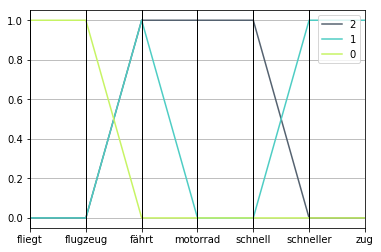

In [97]:
from matplotlib import pyplot as plt
pd.plotting.parallel_coordinates(beispiel_bowDF, 'auto', color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

/home/stephan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


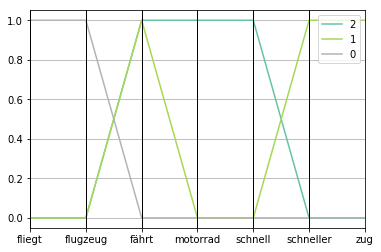

In [98]:
from pandas.tools.plotting import parallel_coordinates
import seaborn as sns
parallel_coordinates(beispiel_bowDF, 'auto', colormap=plt.get_cmap("Set2"))
plt.show()

## Term Frequency - Inverse Document Frequency (TF-IDF)

### Term Frequency

In [99]:
def term_frequency(bow, documents):
    import pandas as pd
    tfDict= {}
    
    for key in documents:
        tfCount = {}
        doc = documents.get(key)
        wordCount = len(doc)
        for word, count in bow.get(key).items():
            tfCount[word] = count / float(wordCount)
            
        tfDict[key] = tfCount
        
    tfDF = pd.DataFrame(tfDict).T
        
    return(tfDict, tfDF)

In [100]:
beispiel_tf, beispiel_tfDF = term_frequency(beispiel_bow, beispiel_stopwords)
beispiel_tfDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,0.40,0.0,0.0,0.20,0.2,0.2,0.00,0.00
Dokument_2,0.25,0.0,0.0,0.25,0.0,0.0,0.25,0.25
Dokument_3,0.00,0.5,0.5,0.00,0.0,0.0,0.00,0.00


### Inverse Document Frequency

In [101]:
def inverse_document_frequency(bow):
    import math
    idfDict = {}
    N = len(bow)
    idfDict = dict.fromkeys(bow[next(iter(bow))].keys(),0)
    i = 0
    for key in bow:
        doc = bow.get(key)
        for word, val in doc.items():
            if val > 0:
                idfDict[word] +=1
        i = i + 1
    for word, val in idfDict.items():
        idfDict[word]= math.log(N / float(val))
    
    return(idfDict)

In [102]:
beispiel_idf = inverse_document_frequency(beispiel_bow)
beispiel_idf

{'schneller': 1.0986122886681098,
 'auto': 0.4054651081081644,
 'fliegt': 1.0986122886681098,
 'zug': 1.0986122886681098,
 'flugzeug': 1.0986122886681098,
 'fährt': 0.4054651081081644,
 'motorrad': 1.0986122886681098,
 'schnell': 1.0986122886681098}

In [103]:
# Ausgabe der Frequencies (schlau sortiert?, dass mann auch was sieht top (10)!! nicht mehr)

In [104]:
def term_frequency_inverse_document_frequency(tfBow, idfs):
    import pandas as pd
    tfidf = {}
    tfidfDict = {}
    for key in tfBow:
        text = tfBow.get(key)
        tfidf = {}
        for word, val in text.items():
            tfidf[word] = val * idfs[word]
        tfidfDict[key] = tfidf
    
    tfidfDF = pd.DataFrame(tfidfDict).T
    
    return(tfidfDict, tfidfDF)

In [105]:
beispiel_tfidf, beispiel_tfidfDF = term_frequency_inverse_document_frequency(beispiel_bow, beispiel_idf)
beispiel_tfidfDF

,auto,fliegt,flugzeug,fährt,motorrad,schnell,schneller,zug
Dokument_1,0.810930,0.000000,0.000000,0.405465,1.098612,1.098612,0.000000,0.000000
Dokument_2,0.405465,0.000000,0.000000,0.405465,0.000000,0.000000,1.098612,1.098612
Dokument_3,0.000000,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000


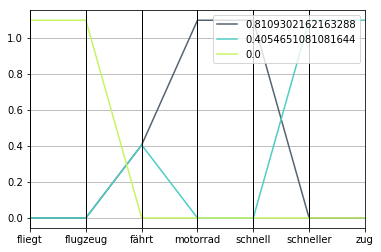

In [106]:
from matplotlib import pyplot as plt
pd.plotting.parallel_coordinates(beispiel_tfidfDF, 'auto', color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

In [107]:
vocabulary = get_vocabulary(stopwordsRemoved)
bow, bowDF = bag_of_words(stopwordsRemoved, vocabulary)
tf, tfDF = term_frequency(bow, stopwordsRemoved)
idf = inverse_document_frequency(bow)
tfidf, tfidfDF = term_frequency_inverse_document_frequency(bow, idf)

In [108]:
# Ausgabe der Frequencies (schlau sortiert?, dass mann auch was sieht top (10)!! nicht mehr)

In [109]:
# Dann legts du die Dinger Unter / Nebeneinander zum Vergleichen

In [110]:
# Parallel Plot zur Visualisierung der Unterschiede 
# https://stackoverflow.com/questions/8230638/parallel-coordinates-plot-in-matplotlib

# Anwendungsbeispiel: Keywordsuche

In [111]:
vocabulary = get_vocabulary(stopwordsRemoved)
bow, bowDF = bag_of_words(stopwordsRemoved, vocabulary)
tf, tfDF = term_frequency(bow, stopwordsRemoved)
idf = inverse_document_frequency(bow)
tfidf, tfidfDF = term_frequency_inverse_document_frequency(bow, idf)

In [112]:
tfidfDataFrame = tfidfDF.transpose()

# Erstellen einer Keywordsuche


![Keywordsuche](./Grafiken/KeywordSearch.jpg)

In [113]:
def search_keyword(keyword, tfidfDataFrame):

    searchList = []
    for doc in tfidfDataFrame:
        vec = tfidfDataFrame[doc]
        if vec.get(keyword) != 0:
            tfidf_value = vec.get(keyword)
            searchList.append([tfidf_value, doc])
    return sorted(searchList, reverse=True)

def search_top_word_documents(keyword, tfidfDataFrame):
    
    topDocsList = []
    docList = []
    topWordDocuments = {}
    for doc in tfidfDataFrame:
        vec = tfidfDataFrame[doc]
        if vec.get(keyword) != 0:
            topDocsList.append(doc)
        topWordDocuments[keyword] = topDocsList
    return(topWordDocuments)

def get_top_words(document, n, tfidfDataFrame):
    
    topDict = {}
    topList = []
    vec = tfidfDataFrame[document]
    sorted_vec = vec.sort_values(ascending=False)
    top = sorted_vec[0:n]
    for i, row in top.iteritems():
        if i != keyword:
            topList.append(i)
    topDict[document] = topList[0:n-2]
    return(topDict)
            
def get_top_words_documents(docName, relDocs, tfidfDataFrame):
    
    wordList = []
    topWordDocList = []
    wordList = relDocs.get(docName)
    for word in wordList:
        topWordDocList.append(search_top_word_documents(word, tfidfDataFrame))
    return(topWordDocList)
    
def related_docs(docs, n, tfidfDataFrame):
    
    relatedDocs = []
    n += 2
    for doc in docs:
        docName = doc[1]
        relDocs = get_top_words(docName, n, tfidfDataFrame)
        topWordDocs = get_top_words_documents(docName, relDocs, tfidfDataFrame)
        relatedDocs.append([doc[1], relDocs, topWordDocs])
    return(relatedDocs)

def keyword_search(keyword, tfidfDataFrame):
    search = search_keyword(keyword, tfidfDataFrame)
    complete = related_docs(search, 5, tfidfDataFrame)
    return(complete)

keyword = 'apple'
result = keyword_search(keyword, tfidfDataFrame)

i = 1

print('SUCHBEGRIFF: ' + keyword)
print('Gefunden in folgenden Dokumenten:')
print('_'*100)
print('')
for res in result:
    #print(x[0])
    print('RANG: ' + str(i))
    print('DOKUMENT: ' + res[0])
    print('Weitere, wichtige Begriffe in "' + res[0] + '"')
    topWords = res[1].get(res[0])
    topDocuments = res[2]
    for topW in topWords:
        for topD in topDocuments:
            if topD.get(topW) != None:
                x = topD.get(topW)
                print('"' + str(topW) + '"' + ', bedeutsam in: "' + x[0] + '"')
    i+=1
    print('_'*100)
    print('')

SUCHBEGRIFF: apple
Gefunden in folgenden Dokumenten:
____________________________________________________________________________________________________

RANG: 1
DOKUMENT: Hollywood-Stars präsentieren
Weitere, wichtige Begriffe in "Hollywood-Stars präsentieren"
"kreditkarte", bedeutsam in: "Konkurrenz für Netflix"
"nachrichtenportal", bedeutsam in: "Hollywood-Stars präsentieren"
"tv", bedeutsam in: "Hollywood-Stars präsentieren"
"verfügbar", bedeutsam in: "Hollywood-Stars präsentieren"
"dienst", bedeutsam in: "Konkurrenz für Netflix"
____________________________________________________________________________________________________

RANG: 2
DOKUMENT: Konkurrenz für Netflix
Weitere, wichtige Begriffe in "Konkurrenz für Netflix"
"konzern", bedeutsam in: "Konkurrenz für Netflix"
"shows", bedeutsam in: "Konkurrenz für Netflix"
"netflix", bedeutsam in: "Konkurrenz für Netflix"
"inhalte", bedeutsam in: "Konkurrenz für Netflix"
"zufolge", bedeutsam in: "Konkurrenz für Netflix"
_____________

### Wo bin ich Übersicht

# Anwendungsbeispiel: Clustering

![Clustering](./Grafiken/Clustering.jpg)

In [114]:
import pandas as pd

dataframe = pd.DataFrame.from_dict(documents, orient = 'index')
dataframe.reset_index(level=0, inplace=True)
dataframe.columns = ['file', 'token']

In [115]:
vocabulary = get_vocabulary(stopwordsRemoved)
bow, bowDF = bag_of_words(stopwordsRemoved, vocabulary)
tf, tfDF = term_frequency(bow, stopwordsRemoved)
idf = inverse_document_frequency(bow)
tfidf, tfidfDF = term_frequency_inverse_document_frequency(bow, idf)

In [116]:
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
import numpy as np
import scipy
from scipy.sparse import csr_matrix

tfidfDF = scipy.sparse.csr_matrix(tfidfDF)

def kMeans_clustering(feature_matrix):
    
    km = KMeans(n_clusters=5, max_iter=10000)
    km.fit(feature_matrix.todense())
    clusters = km.labels_          
    return km, clusters

km_obj, clusters = kMeans_clustering(feature_matrix=tfidfDF)

cluster = pd.DataFrame(clusters)

dataframe['Cluster'] = cluster

c = Counter(clusters)
total_clusters=len(c)

cluster_details = {}  
    
ordered_centroids = km_obj.cluster_centers_.argsort()[:, ::-1]

topn_features=10

feature_names = sorted(vocabulary)

for cluster_num in range(total_clusters):
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster_num'] = cluster_num
    key_features = [feature_names[index]
                    for index
                    in ordered_centroids[cluster_num, :topn_features]]
    cluster_details[cluster_num]['key_features'] = key_features
    files = dataframe[dataframe['Cluster'] == cluster_num]['file'].values.tolist()
    cluster_details[cluster_num]['token'] = files

In [117]:
cluster_details

{0: {'cluster_num': 0,
  'key_features': ['model',
   '3',
   'tesla',
   'reichweite',
   'autopilot',
   'aktuell',
   'kilometer',
   'wagen',
   'autopiloten',
   'smartphone'],
  'token': ['Tesla im Fahrtest']},
 1: {'cluster_num': 1,
  'key_features': ['apple',
   'kreditkarte',
   'netflix',
   'konzern',
   'dienst',
   'inhalte',
   'montag',
   'times',
   'geräte',
   'nachrichtenportal'],
  'token': ['Konkurrenz für Netflix', 'Hollywood-Stars präsentieren']},
 2: {'cluster_num': 2,
  'key_features': ['liverpool',
   'klopp',
   'tottenham',
   'spurs',
   'reds',
   'city',
   'league',
   'premier',
   'fc',
   'salah'],
  'token': ['Klopp geht all in und gewinnt']},
 3: {'cluster_num': 3,
  'key_features': ['bmw',
   'x5',
   'x7',
   'glc',
   'coupé',
   'suv',
   'mercedesbenz',
   'porsche',
   'liter',
   'geländewagen'],
  'token': ['Deutschland sucht das Super-SUV', 'BMW setzt noch einen drauf']},
 4: {'cluster_num': 4,
  'key_features': ['apple',
   'banken',
   '

In [118]:
import pandas as pd

dataframe = pd.DataFrame.from_dict(tokenized, orient = 'index')
dataframe.reset_index(level=0, inplace=True)
dataframe.columns = ['file', 'token']
#dataframe

ValueError: Length mismatch: Expected axis has 1255 elements, new values have 2 elements

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

def display_features(features, feature_names):
    df = pd.DataFrame(data=features, columns=feature_names)
    return df

def tfidf_extractor(corpus, ngram_range=(1,1)):
    
    vectorizer = TfidfVectorizer(min_df=1, norm='l2', smooth_idf=True, use_idf=True, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

tfidf_vectorizer, tfidf_features = tfidf_extractor(dataframe['token'])
print(tfidf_features[0].shape)
feature_names = tfidf_vectorizer.get_feature_names()
print(type(tfidf_features))
print(tfidf_features.shape)
df = display_features(np.round(tfidf_features.todense(), 4), feature_names)

In [149]:
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
def kMeans_clustering(feature_matrix):
    
    km = KMeans(n_clusters=5, max_iter=10000)
    km.fit(feature_matrix.todense())
    clusters = km.labels_          
    return km, clusters

km_obj, clusters = kMeans_clustering(feature_matrix=tfidf_features)

cluster = pd.DataFrame(clusters)

dataframe['Cluster'] = cluster

c = Counter(clusters)
total_clusters=len(c)

cluster_details = {}  
    
ordered_centroids = km_obj.cluster_centers_.argsort()[:, ::-1]

topn_features=10

#feature_names = sorted(vocabulary)

for cluster_num in range(total_clusters):
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster_num'] = cluster_num
    key_features = [feature_names[index]
                    for index
                    in ordered_centroids[cluster_num, :topn_features]]
    cluster_details[cluster_num]['key_features'] = key_features
    files = dataframe[dataframe['Cluster'] == cluster_num]['file'].values.tolist()
    cluster_details[cluster_num]['token'] = files
    
cluster_details

{0: {'cluster_num': 0,
  'key_features': ['der',
   'die',
   'und',
   'bmw',
   'x5',
   'mit',
   'das',
   'x7',
   'ps',
   'ist'],
  'token': ['Mittelklasse, nur nicht beim Preis',
   'Deutschland sucht das Super-SUV',
   'BMW setzt noch einen drauf']},
 1: {'cluster_num': 1,
  'key_features': ['der',
   'die',
   'in',
   'und',
   'liverpool',
   'er',
   'den',
   'löw',
   'fc',
   'gegen'],
  'token': ['Zweite Bundesliga',
   'Joachim Löw und die Nationalelf',
   'Dramatischer Liverpool-Sieg durch spätes Eigentor',
   'Jetzt wird Bayern nervös',
   'Klopp geht all in und gewinnt']},
 2: {'cluster_num': 2,
  'key_features': ['apple',
   'der',
   'die',
   'und',
   'wie',
   'konzern',
   'von',
   'für',
   'airpower',
   'den'],
  'token': ['Konkurrenz für Netflix',
   'Ladematte AirPower',
   'Hollywood-Stars präsentieren',
   'Lebensrettende Massnahmen für Apple TV',
   'Bleibt doch noch ein bisschen']},
 3: {'cluster_num': 3,
  'key_features': ['die',
   'der',
   'und'